In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error

#### ici nous allons importer la dataset depuis le lien sur kaggle
https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis?select=CC+GENERAL.csv

In [2]:
import pandas as pd
df=pd.read_csv("assets/CC GENERAL.csv")
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### les données contiennent des valurs NaN il faut enlever ces valeurs avec la fct dropna()

In [3]:
df_new=df.dropna()
df_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [4]:
del df_new['CUST_ID']

In [5]:
#df_new.isnull()

### k-means sans normalisation

In [6]:
#Cluster = KMeans(n_clusters=5)
#Cluster.fit(df_new)
#y_pred = Cluster.predict(df_new)

In [7]:
#B=np.array(df_new)
#plt.scatter(B[:, 0], B[:, 1], c=y_pred)
#plt.show()

#### Pour que l'algorithme fonctionne bien il faut un préprocessing avant d'appliquer l'algorithme K-mean


In [12]:
def normalase(X):
    Min=np.min(X)
    Max=np.max(X)
    normalize=(X-Min)/(Max-Min)
    return normalize
Z=normalase(df_new)
Z.shape

(8636, 17)

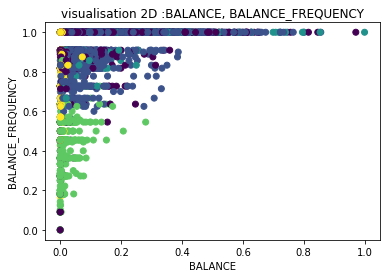

In [13]:

Cluster = KMeans(n_clusters=5)
Cluster.fit(Z)
y_pred = Cluster.predict(Z)
J=np.array(Z)
plt.scatter(J[:, 0], J[:, 1], c=y_pred)
plt.title('visualisation 2D :BALANCE, BALANCE_FREQUENCY')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

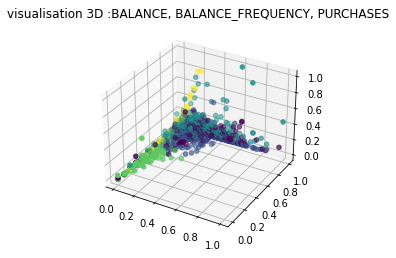

In [14]:
ax=plt.axes(projection='3d')
ax.scatter3D(J[:, 0], J[:, 1],J[:, 2],c=y_pred)
plt.title('visualisation 3D :BALANCE, BALANCE_FREQUENCY, PURCHASES')
plt.show()

####  malgé la normalisation de nos datasets nos cluster ne sont pas clairement montré pour cela nous allons appliqué l'algrithme de  réduction des dimentions PCA

###  PCA :  Réduction des dimensions

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.492046,-0.106987
1,-0.620691,-0.030137
2,0.291581,0.922922
3,-0.567819,0.023027
4,0.188140,-0.249456


In [16]:
T=np.array(principalDf)
T

array([[-0.49204622, -0.10698665],
       [-0.62069095, -0.03013663],
       [ 0.29158121,  0.92292203],
       ...,
       [ 0.35722178, -0.39702329],
       [-0.65011311, -0.17049514],
       [-0.09625919,  0.4548037 ]])

###  WCSS (within-cluster sum of squares) permet de savoir k  

<function matplotlib.pyplot.show(close=None, block=None)>

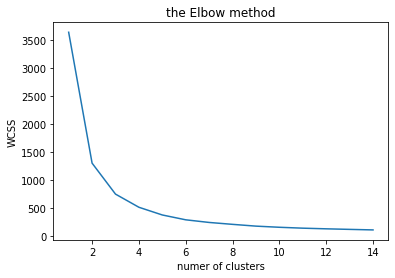

In [17]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(T)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.title('the Elbow method')
plt.xlabel('numer of clusters')
plt.ylabel('WCSS')
plt.show

#### Nous pouvons regarder le graphique ci-dessus et dire que nous avons besoin de 6 centroïdes pour faire le clustering K-means. Maintenant, utilisons la valeur 6 pour le nombre optimal de grappes et l'ajustement du modèle pour faire le clustering.

### K-means from scratch (2 variabes)

In [18]:
class K_Means:
    
    def __init__(self, k=6, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
#initialiser les centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
#les classes
        for i in range(self.max_iter):
            self.classifications = {}
#pour chaque classe elle a une liste des points
            for i in range(self.k):
                self.classifications[i] = []
               
#calculer la distance de chaque pt avec tous les centres et puis choisir le minimum de ces distances, l'index et 
# le pt correspondant à ce minimmum on les stockent dans classifications[index]et on aura une liste des listes des pts affecte à ses clasess
#[0.0, 0.5385164807134502, 0.509901951359278]
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                #print(distances)
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            #ici on stock les anciens centres pour ne pas les perdres
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                #print(classification) ici classification ie  0 ou 1 ou 2
                #calculer les moyens des centroids pour obtenir le nouveau centroid
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    
                    print(np.sum((current_centroid - original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [57]:
model = K_Means()
model.fit(T)

80.53584708039686
514.1415816060631
131.15563941578623
20.367172350167742
39.31621204577034
16.888190802312728
2.0530657853444207
8.615103851890193
6.133502933883561
1.7995263797708079
7.092795037659471
4.394681806814252
0.6981918486998069
232.1647363862656
5.335909417339906
2.9430319680921198
41.52909656648553
3.2281525992986184
1.7905564239111165
14.638137530341577
2.1653326369762103
0.5281079722483962
8.655799754415948
1.5617587705278955
0.29902310905143964
4.409336746351665
1.0406980648348847
0.2462964811292629
2.3490624240487916
0.4943922574288486
0.19342245970572244
1.0752434986735364
0.2867333056820778
0.3456583701113223
0.08124669306415135
0.34094507684887276
0.05334004472684329
0.37093534198300243
0.14945691408795048


In [58]:
y_pre=[]
for classification in model.classifications:
    for featureset in model.classifications[classification]:
        y_pre.append(model.predict(featureset))
y_pre=np.array(y_pre)
y_pre

array([0, 0, 0, ..., 5, 5, 5])

In [59]:
colors=['green','red','blue','black','orange','grey']
for classification in model.classifications:
    color = colors[classification]
    print(color)
    for featureset in model.classifications[classification]:
        print(featureset)

green
[ 0.18814027 -0.24945621]
[ 0.01323628 -0.1757915 ]
[-0.13801244 -0.24444897]
[ 0.21767953 -0.12908413]
[ 0.23839991 -0.28698778]
[0.07667514 0.04261416]
[-0.08646208 -0.1836336 ]
[-0.16319678 -0.1212944 ]
[ 0.22585715 -0.149819  ]
[-0.03073577 -0.12226412]
[ 0.29703035 -0.28614761]
[ 0.26046352 -0.11696691]
[-0.08909734 -0.00452085]
[ 0.12765553 -0.28448396]
[-0.21515264 -0.19648604]
[ 0.16945899 -0.06973983]
[0.31833328 0.18194866]
[ 0.12302842 -0.2607881 ]
[-0.27860459 -0.21398936]
[ 0.34625329 -0.0659083 ]
[ 0.04779048 -0.27219915]
[-0.09910351  0.02915721]
[0.3026926  0.22990029]
[0.02071728 0.00918473]
[ 0.07531919 -0.16605437]
[-0.23550925 -0.1480392 ]
[-0.09960082 -0.26777582]
[0.19232458 0.21149492]
[ 0.03424719 -0.14778173]
[-0.0182716  -0.05499157]
[ 0.30603518 -0.03205523]
[-0.04505704 -0.11916363]
[-0.07676785 -0.23993822]
[ 0.00998583 -0.00268047]
[ 0.10908027 -0.14316224]
[-0.04161795 -0.21056562]
[-0.17866362 -0.25926053]
[ 0.02533668 -0.16507406]
[ 0.05107677 -0.

[-0.13201191 -0.08389639]
[-0.1989267  -0.15795898]
[0.39095949 0.02163669]
[ 0.13359067 -0.31357668]
[ 0.23640845 -0.31924841]
[ 0.04744524 -0.1054512 ]
[-0.06681431 -0.26182707]
[ 0.16990478 -0.01824526]
[ 0.08031534 -0.23775232]
[ 0.18960088 -0.27843417]
[ 0.13982714 -0.24267016]
[-0.09178578 -0.20626738]
[-0.09363927 -0.23965715]
[-0.06171652 -0.26108498]
[ 0.13704279 -0.3052398 ]
[ 0.26048078 -0.22216148]
[-0.09266659 -0.20586329]
[-0.08721829 -0.17043692]
[ 0.00800639 -0.26845433]
[-0.0195098  -0.05652455]
[ 0.0262988 -0.2854353]
[ 0.11949796 -0.30526572]
[-0.13331851 -0.1509954 ]
[ 0.26758055 -0.25345233]
[0.12242406 0.01233564]
[0.02963323 0.02543164]
[ 0.14961236 -0.15248775]
[ 0.3115421  -0.02273871]
[ 0.1247079  -0.23179445]
[-0.04586041 -0.15945722]
[ 0.3013719  -0.27566231]
[-0.00377827 -0.30283225]
[ 0.01444234 -0.23073832]
[ 0.24865229 -0.0792758 ]
[ 0.23995774 -0.06864088]
[-0.04543919 -0.09380435]
[ 0.21673176 -0.33566995]
[ 0.18505888 -0.24453612]
[-0.2387094  -0.2335

[-0.57284572  0.09060094]
[-0.65030354 -0.04849043]
[-0.69205612  0.0060288 ]
[-0.58524853  0.08593517]
[-0.554536   -0.00131292]
[-0.64829378 -0.08676058]
[-0.56744325  0.04992485]
[-0.6508254  -0.05061556]
[-0.29660012 -0.25479027]
[-0.47512493  0.11520799]
[-0.65752088 -0.03766802]
[-0.66096602 -0.0419053 ]
[-0.50760763  0.09405079]
[-0.56816674  0.02728353]
[-0.66723849 -0.05602418]
[-0.68347776 -0.12461518]
[-0.66776984 -0.03848543]
[-0.61839115 -0.08945778]
[-0.32518773 -0.03883248]
[-0.65052742 -0.05303631]
[-0.70735955 -0.11749885]
[-0.57205155  0.05121775]
[-0.6701882  -0.00271103]
[-0.57242541  0.02915302]
[-0.650462  -0.0531441]
[-0.58426988 -0.03998209]
[-0.63065281 -0.04210846]
[-0.68189052  0.00552463]
[-0.66114744 -0.00294717]
[-0.66074521 -0.0435333 ]
[-0.66358883 -0.03382898]
[-0.65473915 -0.03547903]
[-0.66068593  0.0804602 ]
[-0.6600777  -0.14947561]
[-0.59296868  0.1436154 ]
[-0.58681682  0.13073919]
[-0.66359044 -0.0487656 ]
[-0.5623118   0.06115072]
[-0.54750398  

[-0.71706868 -0.14127347]
[-0.56629771  0.02099255]
[-0.59511779 -0.00195092]
[-0.57195776  0.04009193]
[-0.57265633  0.02547295]
[-0.54030475 -0.07482592]
[-0.61182845 -0.05272777]
[-0.65973386  0.00584978]
[-0.66535884 -0.00897635]
[-0.70116086 -0.1201859 ]
[-0.5815782   0.02927277]
[-0.67486554  0.00259003]
[-0.64127744 -0.07362296]
[-0.69533539 -0.11308921]
[-0.51408796 -0.05219041]
[-0.49447307  0.10989844]
[-0.65933458 -0.04978916]
[-0.56177313  0.04704433]
[-0.65024226 -0.0534767 ]
[-0.57260577  0.02399218]
[-0.56622355  0.04431856]
[-0.52115956 -0.15235009]
[-0.44872767  0.11121436]
[-0.56814718  0.01997789]
[-0.68385092 -0.12575336]
[-0.54962782  0.04218366]
[-0.70763594 -0.14009302]
[-0.68152064 -0.00889006]
[-5.49331840e-01  3.33959494e-04]
[-0.64692759 -0.03467889]
[-0.59621104 -0.12474505]
[-0.68056438 -0.05318287]
[-0.66830803 -0.03979259]
[-0.56158611 -0.01245676]
[-0.52505666  0.16570684]
[-0.59022545  0.041257  ]
[-0.64480199 -0.00660976]
[-0.6847922   0.00125987]
[-0.

[-0.70001477 -0.11631372]
[-0.36116017 -0.03903721]
[-0.65287547 -0.01022675]
[-0.65582275 -0.01886108]
[-0.48223661  0.13449936]
[-0.65961831 -0.04797226]
[-0.64969359 -0.02790132]
[-0.65142407 -0.00217995]
[-0.59586959 -0.01771926]
[-0.58828909  0.03290268]
[-0.56583579  0.03971778]
[-0.50999368  0.14084267]
[-0.353203   -0.11565996]
[-0.65026078 -0.05114691]
[-0.65370037 -0.03331354]
[-0.70212223 -0.13188351]
[-0.50050599  0.14945848]
[-0.63611192 -0.04676242]
[-0.70185076 -0.09046678]
[-0.56529099  0.04904905]
[-0.4010637  -0.10736053]
[-0.43698229  0.06822963]
[-0.69748584  0.00398391]
[-0.48374147 -0.2173326 ]
[-0.57247375  0.00865378]
[-0.56423563  0.04122622]
[-0.65740098 -0.02226058]
[-0.36739504 -0.10747767]
[-0.66336705 -0.02354441]
[-0.6147314  -0.19122597]
[-0.61496631 -0.0640093 ]
[-0.72270222 -0.17821834]
[-0.56302066  0.0120862 ]
[-0.65102082 -0.02739732]
[-0.61283677  0.02101575]
[-0.56554396  0.02896745]
[-0.65899016 -0.03632313]
[-0.6551081  -0.00876787]
[-0.68206327

[-0.67670459 -0.03615673]
[-0.65551905 -0.00232894]
[-0.67922082 -0.06297575]
[-0.67272694  0.03494253]
[-0.66696066 -0.07025769]
[-0.48679442  0.11129088]
[-0.65395462  0.01792504]
[-0.66879384 -0.04325433]
[-0.684284   -0.02053898]
[-0.53904253 -0.08329999]
[-0.63953832 -0.09195271]
[-0.5589432   0.05112172]
[-0.60383984 -0.03893276]
[-0.54342161 -0.04439737]
[-0.64760186 -0.02436464]
[-0.60260845 -0.01413984]
[-0.64903588 -0.05384735]
[-0.5932517   0.02309833]
[-0.6603064  -0.03448425]
[-0.64819846 -0.0778767 ]
[-0.68202066 -0.07525528]
[-0.45864373  0.12145646]
[-0.58594929  0.05324234]
[-0.67235359  0.00068379]
[-0.48967827  0.13122877]
[-0.64991304 -0.04189801]
[-0.63091227 -0.04228388]
[-0.6666641  -0.05291707]
[-0.64234854 -0.0674214 ]
[-0.47078415  0.13176547]
[-0.54317346 -0.07424319]
[-0.67158938  0.02775553]
[-0.612073   -0.05020774]
[-0.63329006 -0.05770652]
[-0.65847371 -0.01002541]
[-0.38901589 -0.09172795]
[-0.6276199  -0.06167144]
[-0.4810694  0.1080605]
[-0.54318118  

[-0.56225113  0.04442664]
[-6.80632593e-01  2.19085730e-04]
[-0.40399403 -0.19071186]
[-0.40303842 -0.220314  ]
[-0.65379314 -0.03781214]
[-0.65353503 -0.02822558]
[-0.65005605 -0.0398524 ]
[-0.64152695 -0.06623867]
[-0.5666834   0.02938022]
[-0.64530222 -0.01591463]
[-0.68655534 -0.02637538]
[-0.51827403 -0.18743963]
[-0.65028958 -0.03905214]
[-0.65776611 -0.04312148]
[-0.48073031 -0.20922592]
[-0.70905886 -0.12504285]
[-0.65492983 -0.05155212]
[-0.49566091 -0.12540292]
[-0.4013112   0.02290336]
[-0.6834848   0.01529435]
[-0.65281785 -0.05157121]
[-0.65929219 -0.04746316]
[-0.68232464 -0.12315723]
[-0.60843376 -0.05523801]
[-0.65587926 -0.10209268]
[-0.65463883  0.00068291]
[-0.67712247 -0.00310138]
[-0.66393497 -0.0438745 ]
[-0.66346128 -0.03539501]
[-0.56526054  0.02923494]
[-0.6533112  -0.02967403]
[-0.6662449   0.02415979]
[-0.35206437 -0.17079848]
[-0.50405822  0.13609888]
[-0.63757425 -0.05432544]
[-0.65012444 -0.0430252 ]
[-0.5984042   0.03219754]
[-0.4837399   0.10122109]
[-0.

[-0.48918184  0.09978844]
[-0.65057765 -0.05706348]
[-0.6514408   0.00985471]
[-0.64091798  0.00326371]
[-0.63810793 -0.12804931]
[-0.41536464  0.00773133]
[-0.65028215 -0.05038264]
[-0.49364208 -0.19298161]
[-0.31714003 -0.19763805]
[-0.66803684 -0.01320663]
[-0.70003193 -0.12897833]
[-0.58784901  0.03162587]
[-0.42526849 -0.2093762 ]
[-0.66671848 -0.0819458 ]
[-0.57236653 -0.00735684]
[-0.48573614  0.11736326]
[-0.64168811 -0.05050879]
[-0.64887762 -0.04866884]
[-0.45336194  0.00368885]
[-0.6780798  -0.03784458]
[-0.35478067 -0.14419598]
[-0.31312814 -0.12867051]
[-0.67393958 -0.03862999]
[-0.68812784 -0.02447574]
[-0.50957329 -0.17108696]
[-0.66153756 -0.02081797]
[-0.64574816 -0.03292832]
[-0.66416841 -0.00419757]
[-0.68780093 -0.11838613]
[-0.58860415  0.06376852]
[-0.60265025 -0.03347673]
[-0.68130409 -0.0541143 ]
[-0.67359084 -0.03760856]
[-0.49969318  0.10169776]
[-0.47097363  0.10559784]
[-0.5526963   0.03779098]
[-0.65923863 -0.04356132]
[-0.6706981  -0.00888849]
[-0.64925246

[-0.6945999  -0.14244079]
[-0.58527361 -0.0267068 ]
[-0.75274738 -0.23042047]
[-0.62797302 -0.2218109 ]
[-0.68772047 -0.12388935]
[-0.73811785 -0.22518495]
[-0.73821433 -0.22564641]
[-0.69187645 -0.14639397]
[-0.5379012   0.00947289]
[-0.5379567   0.00772002]
[-0.54603188 -0.21487235]
[-0.69564767 -0.1223868 ]
[-0.72221033 -0.17332526]
[-0.57422774 -0.0678338 ]
[-0.71326771 -0.18431971]
[-0.66143615 -0.21267741]
[-0.56305113 -0.05626373]
[-0.65011311 -0.17049514]
blue
[0.29158121 0.92292203]
[0.26915582 0.80084822]
[0.28232903 0.29471381]
[0.5632899  0.63989434]
[0.35622225 0.23924593]
[0.29728874 0.93771502]
[0.51624096 0.80115798]
[0.50364183 0.93301708]
[-0.01902618  0.59908596]
[0.26952739 0.89983077]
[0.2821369  0.90250948]
[0.27543625 0.81091207]
[0.05845688 0.67347909]
[0.34615673 0.88955928]
[0.21103378 0.8369217 ]
[0.63270073 0.76622229]
[0.49729593 0.91131636]
[0.37727034 0.52871643]
[0.21350042 0.84473343]
[0.36251542 0.63303029]
[0.28752326 0.90448132]
[0.10043263 0.5608917

[0.52439695 0.60228238]
[0.12138388 0.52035263]
[0.4872403  0.66853035]
[0.36232875 0.91571184]
[0.21541808 0.2659465 ]
[0.03796106 0.54600712]
[0.43608083 0.70574496]
[0.26109376 0.80698455]
[0.55689687 0.82665524]
[0.36583051 0.81995498]
[-0.00195738  0.58024179]
[0.29090461 0.92200883]
[0.29639943 0.93984903]
[0.46417729 0.86844377]
[0.36069666 0.88403607]
[0.21218316 0.84065187]
[0.26461806 0.26803109]
[0.10489138 0.52375179]
[0.47361927 0.89182446]
[0.2916536 0.9458433]
[0.22965746 0.63823778]
[0.07120066 0.74099947]
[0.50431054 0.86660605]
[0.28077325 0.87612916]
[0.03823355 0.72076471]
[0.50435057 0.92705127]
[0.66130762 0.6699129 ]
[0.06073632 0.67866329]
[0.59480552 0.63811099]
[0.46988489 0.86852138]
[0.14303956 0.7737492 ]
[0.29002227 0.90020357]
[0.31670578 0.24879332]
[0.27419084 0.41554317]
[0.50599189 0.63907089]
[0.55756067 0.74313305]
[0.29106213 0.90574616]
[0.4124846  0.53046124]
[0.30326414 0.9551315 ]
[0.48910743 0.94248894]
[0.10644672 0.44655148]
[0.48702975 0.79

[-0.24573013  0.1078265 ]
[-0.23817397  0.3348207 ]
[-0.33326132  0.29184164]
[-0.07198377  0.34906672]
[-0.16790486  0.39957968]
[0.01564024 0.46702783]
[-0.156884    0.04441442]
[-0.33405124  0.26647154]
[-0.01324492  0.3586093 ]
[-0.24771728  0.11591817]
[-0.15482699  0.41966323]
[-0.41191541  0.15718792]
[-0.364651    0.29314506]
[-0.27581119  0.36595315]
[-0.2884271  -0.02832439]
[-0.12614832  0.31061069]
[-0.13841318  0.234019  ]
[-0.34770584  0.26793931]
[-0.30169501  0.15078123]
[-0.09441572  0.49068976]
[-0.20998865  0.3557456 ]
[-0.37133172  0.15986893]
[-0.27202956  0.35638497]
[-0.44445954  0.19854547]
[-0.33021911  0.04818305]
[-0.33938181  0.2631065 ]
[-0.17517162  0.18166071]
[-0.0163645  0.3349578]
[-0.21207259  0.46765866]
[-0.35074638  0.30793409]
[-0.12322966  0.3868412 ]
[-0.25582453  0.18019892]
[-0.22110509  0.32586252]
[-0.14082713  0.16564771]
[-0.1262423   0.42031579]
[-0.13340669  0.26247219]
[-0.06061078  0.36270891]
[-0.40614419  0.1630903 ]
[-0.24387501  0.

[-0.33192294  0.26359148]
[-0.05418566  0.49221041]
[-0.01659096  0.49578823]
[-0.42591233  0.20369102]
[-0.3037962   0.23003327]
[-0.34508081  0.27708074]
[-0.26139212  0.36278255]
[-0.23327318 -0.05589438]
[0.13216045 0.21502796]
[-0.17824412  0.41538144]
[0.17011658 0.28969569]
[-0.412156    0.18275036]
[-0.30597126  0.16844474]
[-0.179237    0.41857035]
[-0.24762494  0.35655369]
[-0.09970582  0.53627816]
[-0.37332912  0.19237534]
[-0.32758512  0.08339856]
[-0.25704759  0.33335343]
[-0.34966869  0.27028083]
[-0.44982131  0.26059484]
[-0.09906805  0.25011526]
[-0.16869766  0.17802861]
[-0.23731249  0.3771041 ]
[-0.27951312  0.29858743]
[-0.30650775 -0.01601394]
[-0.18105912  0.19813178]
[-0.23201466 -0.05386014]
[-0.34154592  0.31713112]
[-0.21564887  0.08759352]
[-0.2672048   0.04773214]
[-0.23172661  0.19162936]
[-0.11866941  0.04498866]
[-0.34964724  0.2084029 ]
[-0.18706767  0.41847203]
[-0.18678154  0.4276003 ]
[0.09556016 0.18214497]
[0.0501908  0.27357677]
[-0.24470033 -0.0616

[ 0.47771763 -0.35696346]
[ 0.59892861 -0.22206928]
[0.57531037 0.05774458]
[ 0.60342369 -0.34660465]
[ 0.5018241 -0.0892276]
[ 0.88736758 -0.43036319]
[ 0.68450982 -0.22559786]
[ 0.71781062 -0.22244668]
[ 0.72303272 -0.24753681]
[ 0.76609934 -0.10881322]
[ 0.69247949 -0.42999315]
[ 0.72385414 -0.34177378]
[ 0.68603655 -0.39140828]
[ 0.48070857 -0.03781724]
[ 0.68735233 -0.40775258]
[ 0.45986535 -0.34199834]
[ 0.67152275 -0.3629138 ]
[ 0.73706929 -0.25428279]
[ 0.67129608 -0.40084932]
[ 0.72393382 -0.31951791]
[0.52852592 0.0120892 ]
[ 0.66795339 -0.3790823 ]
[ 0.6188471  -0.37598548]
[ 0.6630671  -0.22166008]
[ 0.51911064 -0.34792032]
[ 0.7832195 -0.2362022]
[ 0.73320164 -0.25935673]
[ 0.57117235 -0.08986064]
[ 0.48641635 -0.30116223]
[ 0.48301233 -0.31596493]
[ 0.72454608 -0.22090672]
[ 0.35068838 -0.31902276]
[ 0.83245214 -0.03313385]
[ 0.49472077 -0.39064328]
[ 0.87792326 -0.33436638]
[ 0.6156914  -0.37017606]
[ 0.72602692 -0.20722644]
[ 0.66770775 -0.40528809]
[ 0.59606246 -0.2026

[ 0.74062514 -0.44998444]
[ 0.73318125 -0.41407662]
[ 0.78754585 -0.41690913]
[ 0.72475124 -0.26516889]
[ 0.8850749  -0.43587089]
[ 0.68846568 -0.39772514]
[ 0.73801156 -0.42255026]
[ 0.49996494 -0.2773284 ]
[ 0.51640663 -0.27159173]
[ 0.81373208 -0.20708347]
[ 0.39367311 -0.37128896]
[ 0.53196663 -0.33817093]
[ 0.70457407 -0.39408819]
[ 0.88897766 -0.41962706]
[ 0.5191812 -0.0890229]
[ 0.51079407 -0.31036834]
[ 0.7652381  -0.42500566]
[ 0.83472997 -0.42110767]
[ 0.74432028 -0.22002735]
[ 0.70810914 -0.38849088]
[ 0.56620689 -0.392571  ]
[ 0.65551627 -0.12619446]
[ 0.41768245 -0.42355575]
[ 0.66640622 -0.30476236]
[ 0.77908062 -0.01854488]
[ 0.66664313 -0.38259285]
[ 0.98877569 -0.06365409]
[ 0.77433539 -0.41587196]
[ 0.78600849 -0.08034049]
[ 0.73802145 -0.39455666]
[ 0.43688194 -0.29742079]
[ 0.69011344 -0.40233471]
[ 0.58817724 -0.47995253]
[0.53414584 0.05502674]
[ 0.61341799 -0.38077296]
[ 0.64543926 -0.25799852]
[ 0.68698848 -0.39279656]
[ 0.51838919 -0.22820178]
[ 0.85357055 -0.

[ 0.71871901 -0.40434762]
[ 0.80039667 -0.40580423]
[ 0.39752599 -0.29322135]
[ 0.65513997 -0.49053163]
[ 0.73609396 -0.2350381 ]
[ 0.58096267 -0.2549829 ]
[0.75812089 0.00863669]
[ 0.6872489 -0.3963816]
[ 0.68732474 -0.39354497]
[ 0.88084058 -0.03580213]
[ 0.70360928 -0.34008368]
[ 0.68160489 -0.41272715]
[ 0.62247998 -0.34413372]
[ 0.70417249 -0.30336865]
[ 0.53599446 -0.221849  ]
[ 0.51718234 -0.3431735 ]
[ 0.76417608 -0.08706902]
[ 0.88131617 -0.43479169]
[ 0.85123932 -0.42841123]
[ 0.888989   -0.42652052]
[ 0.40293533 -0.228651  ]
[ 0.73435207 -0.39437644]
[ 0.47165029 -0.33491421]
[ 0.89510568 -0.42131842]
[ 0.74633026 -0.18328824]
[ 0.37432773 -0.37100611]
[ 0.82405456 -0.36087056]
[ 0.85012993 -0.02672777]
[ 0.37035577 -0.25558711]
[ 0.58464285 -0.1165098 ]
[ 0.41715432 -0.3026574 ]
[ 0.42883726 -0.32929954]
[ 0.51694623 -0.35720344]
[ 0.40787779 -0.30738093]
[ 0.72293458 -0.42087727]
[ 0.69232601 -0.40297972]
[ 0.76559691 -0.42049111]
[ 0.47391466 -0.34240576]
[ 0.62578597 -0.

[ 0.83106141 -0.43469044]
[ 0.72346556 -0.27116898]
[ 0.73912466 -0.39891672]
[ 0.74851664 -0.39383001]
[ 0.68314765 -0.40957228]
[ 0.76554494 -0.42061164]
[ 0.68830191 -0.40856017]
[ 0.70072592 -0.41686896]
[ 0.68152911 -0.4151719 ]
[ 0.63530947 -0.38487039]
[ 0.51791007 -0.38429238]
[ 0.37315202 -0.35368109]
[ 0.43923507 -0.16274855]
[ 0.51833667 -0.40840142]
[ 0.79145136 -0.42326413]
[ 0.68370397 -0.41156094]
[ 0.85873765 -0.35201475]
[ 0.70034801 -0.4249469 ]
[ 0.71868697 -0.4159953 ]
[ 0.68861834 -0.40905187]
[ 0.49732872 -0.23304237]
[ 0.67132879 -0.41071351]
[ 0.74135906 -0.45095588]
[ 0.56314673 -0.34038841]
[ 0.83831638 -0.44079871]
[ 0.34393824 -0.33704453]
[ 0.68185321 -0.41565658]
[ 0.51902814 -0.34651227]
[ 0.42824176 -0.24469113]
[ 0.58200621 -0.30765192]
[ 0.62571627 -0.40237053]
[ 0.68202207 -0.41335043]
[ 0.44360079 -0.19042878]
[ 0.69357887 -0.39913092]
[ 0.63038129 -0.49801521]
[ 0.68494994 -0.38580587]
[ 0.68197681 -0.41462029]
[ 0.67937149 -0.40959338]
[ 0.63823499

[1.09237422 0.49774714]
[0.77912194 0.08562469]
[0.84712768 0.28821524]
[0.54155198 0.40063466]
[0.64063746 0.1030746 ]
[0.80877013 0.01657364]
[0.92236654 0.55409239]
[0.94669478 0.48608453]
[0.83485911 0.37926846]
[0.45596158 0.11157534]
[1.06101371 0.41939082]
[0.80384947 0.44834911]
[0.60208899 0.11786499]
[0.70340021 0.11969737]
[1.05139006 0.14033764]
[0.89967919 0.48799341]
[0.79759593 0.20269137]
[1.01729386 0.27563538]
[0.7564938  0.13142505]
[0.84499743 0.19564114]
[0.70237904 0.3066564 ]
[0.77958241 0.31687867]
[0.49564675 0.24209431]
[0.89231816 0.28837044]
[0.75214599 0.64640839]
[0.5020132  0.17212936]
[0.77572545 0.28552135]
[0.86674787 0.0987294 ]
[0.96176434 0.02793035]
[0.79414507 0.04711993]
[0.64010808 0.09291438]
[0.72894743 0.12326929]
[0.846249   0.12968507]
[0.84568806 0.11819698]
[0.56709768 0.09022438]
[0.82571067 0.09364053]
[0.75003857 0.42329346]
[0.98769672 0.28291644]
[0.91816307 0.48028839]
[0.84415372 0.22037473]
[0.55173708 0.18601001]
[0.58013686 0.37

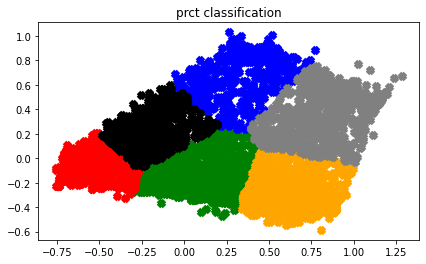

In [30]:
plt.figure(figsize=(15,4))

plt.subplot(122)
colors=['green','red','blue','black','orange','grey']
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k",linewidths=0.5)
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths=5)
plt.title('prct classification')

plt.show()

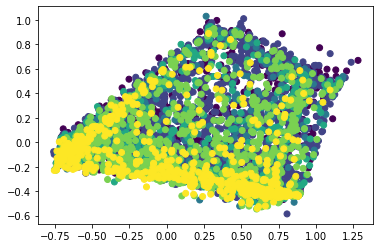

In [60]:
plt.scatter(T[:, 0], T[:, 1], c=y_pre)

###   K-means à l'aide de la biblio (2 variables)


array([1, 1, 4, ..., 5, 1, 3])

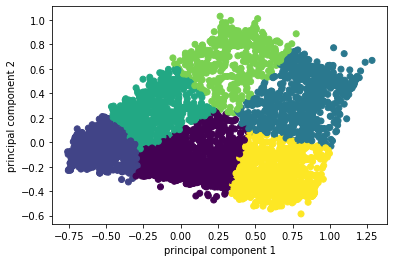

In [61]:
Cluster = KMeans(n_clusters=6)
Cluster.fit(T)
y_pred = Cluster.predict(T)
plt.scatter(T[:, 0], T[:, 1], c=y_pred)

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

y_pred

### Analyse des comportements

#### Or on ne peut pas analyser les resultats en utilisant juste 2 variables

In [62]:
df_new['Cluster']=pd.DataFrame(y_pred)
df_new.head()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,4.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2.0


#### on va se limiter à utiliser 8300 carte credit

In [63]:
new_df=df_new[:8300]

In [64]:
new_df.shape

(8300, 18)

#### Maintenant nous avons notre propre dataset avec leurs cluster, passons maintenant à l'etape d'analyse 

Text(0.5, 1.0, 'Nombre de personnes / Cluster')

<Figure size 720x432 with 0 Axes>

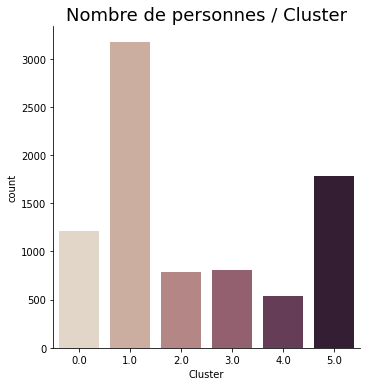

In [65]:
plt.figure(figsize=(10,6))
sns.catplot(x="Cluster", kind="count", palette="ch:.25", data=new_df)
plt.title("Nombre de personnes / Cluster", size=18)

Text(0.5, 1.0, 'Payments / Cluster')

<Figure size 720x432 with 0 Axes>

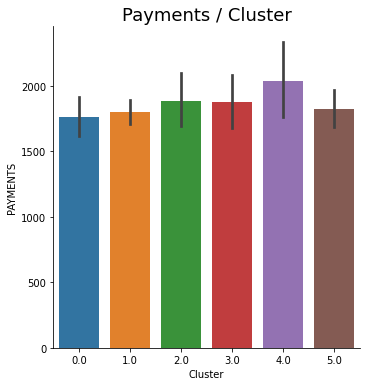

In [66]:
plt.figure(figsize=(10,6))
sns.catplot(x="Cluster", y="PAYMENTS",kind="bar",  data=new_df)
plt.title("Payments / Cluster", size=18)

In [71]:
def call_mean(group):
    avg=np.nanmean(group['PAYMENTS'])
    return avg
new_df.groupby('Cluster').apply(call_mean)


Cluster
0.0    1761.351366
1.0    1799.483548
2.0    1882.134157
3.0    1872.513668
4.0    2036.151250
5.0    1822.636549
dtype: float64

### les gens qui paient le plus sont les gens qui ont le credit limit le plus élevé 

Text(0.5, 1.0, 'CREDIT_LIMIT vs Payments / Cluster')

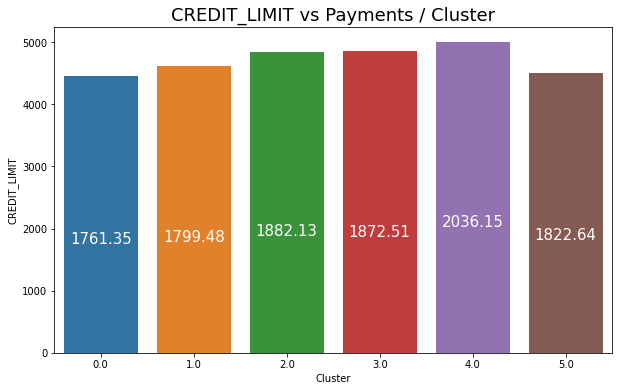

In [68]:
plt.figure(figsize=(10,6))

bar=sns.barplot( x='Cluster', y="CREDIT_LIMIT", data=new_df, ci=False)
#bar.title('Credit card vs Payments/ Cluster')
def call_mean(group):
    avg=np.nanmean(group['PAYMENTS'])
    return avg
cluster=new_df.groupby('Cluster').apply(call_mean)
cluster

for i in range(len(cluster)):
    bar.text(i,cluster[i],str(round(cluster[i],2)),fontdict=dict(color='white',fontsize=15),horizontalalignment='center')

plt.title("CREDIT_LIMIT vs Payments / Cluster", size=18)

#### les clients qui ont les dépenses les plus élevées sont ils ceux qui font le plus de transaction ? pas forcément, comme on observe dans le résultat le groupe 2 et groupe 4, en effet le groupe 2 a le plus nombre de purchases alors il a un moyen de paiements moins que le groupe 4 ce dernier a le moyen de paiements le plus élevé.

Text(0.5, 1.0, 'PURCHASES vs Payments / Cluster')

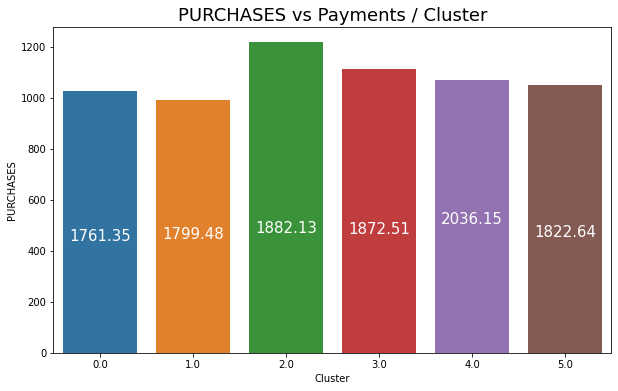

In [69]:
plt.figure(figsize=(10,6))


#bar.title('Credit card vs Payments/ Cluster')
def call_mean(group):
    avg=np.nanmean(group['PAYMENTS'])
    return avg
clusters=new_df.groupby('Cluster').apply(call_mean)

bar=sns.barplot( x='Cluster', y="PURCHASES", data=new_df, ci=False)
for i in range(len(clusters)):
    bar.text(i,clusters[i]/4,str(round(clusters[i],2)),fontdict=dict(color='white',fontsize=15),horizontalalignment='center')

plt.title("PURCHASES vs Payments / Cluster", size=18)

#### les groupes qui ont tendance à recourir au avances de fonds sont les personnes qui ont les dépenses les plus éleves 

Text(0.5, 1.0, 'CASH_ADVANCE vs Payments / Cluster')

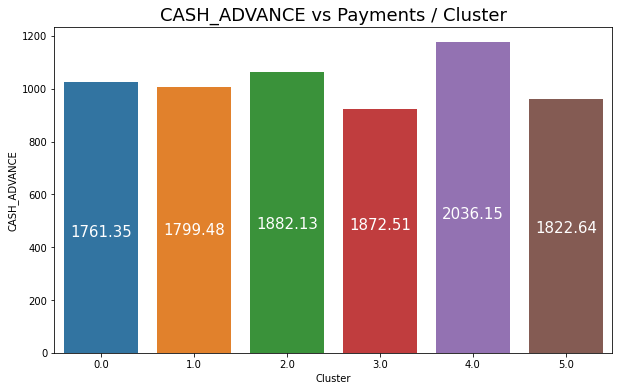

In [70]:
plt.figure(figsize=(10,6))


#bar.title('Credit card vs Payments/ Cluster')
def call_mean(group):
    avg=np.nanmean(group['PAYMENTS'])
    return avg
clusters=new_df.groupby('Cluster').apply(call_mean)

bar=sns.barplot( x='Cluster', y="CASH_ADVANCE", data=new_df, ci=False)
for i in range(len(clusters)):
    bar.text(i,clusters[i]/4,str(round(clusters[i],2)),fontdict=dict(color='white',fontsize=15),horizontalalignment='center')

plt.title("CASH_ADVANCE vs Payments / Cluster", size=18)